
#  Car Resale Price Analysis & Visualization System

## Problem Statement
 You are a data analyst working for a car dealership. You have received a CSV file containing sales data.
 Your goal is to understand the sales pattern, customer behavior, and make visual insights using Python basics,
 Object-Oriented Programming (OOP), NumPy, Pandas, Matplotlib, and Seaborn.

Your job includes:
- Data cleaning and preprocessing
- Basic analysis
- OOP implementation
- Visualization
- Extracting insights


In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [94]:
df = pd.read_csv("/content/daTA.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [96]:
df.Fuel_Type.value_counts()
# Fuel Type 'Petrol' is heigh more then others

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [97]:
df.Seller_Type.value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [98]:
df.Transmission.value_counts()

,count
Transmission,
Manual,261
Automatic,40


In [99]:
df.Owner.value_counts()

,count
Owner,
0,290
1,10
3,1


In [100]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [101]:
df.duplicated().sum()

np.int64(2)

In [102]:
df.drop_duplicates(inplace = True)

In [103]:
df.duplicated().sum()

np.int64(0)

In [104]:
from datetime import date,datetime
today = date.today().year
today
df['age'] = today-df['Year']

In [105]:
df.rename(columns = {'Car_Name':'Brand','Present_Price':'Price'},inplace= True)

In [106]:
df['Segement'] = np.where(df['Price'].values >2000000,'Luxury','Standard')

In [127]:
avg_brand_price = df.groupby('Brand')['Price'].mean().reset_index()
avg_brand_price.columns = ['Brands','Avg_Price']

In [130]:
avg_brand_price.head()

,Brands,Avg_Price
0,800,2.28
1,Activa 3g,0.53
2,Activa 4g,0.51
3,Bajaj ct 100,0.32
4,Bajaj Avenger 150,0.80


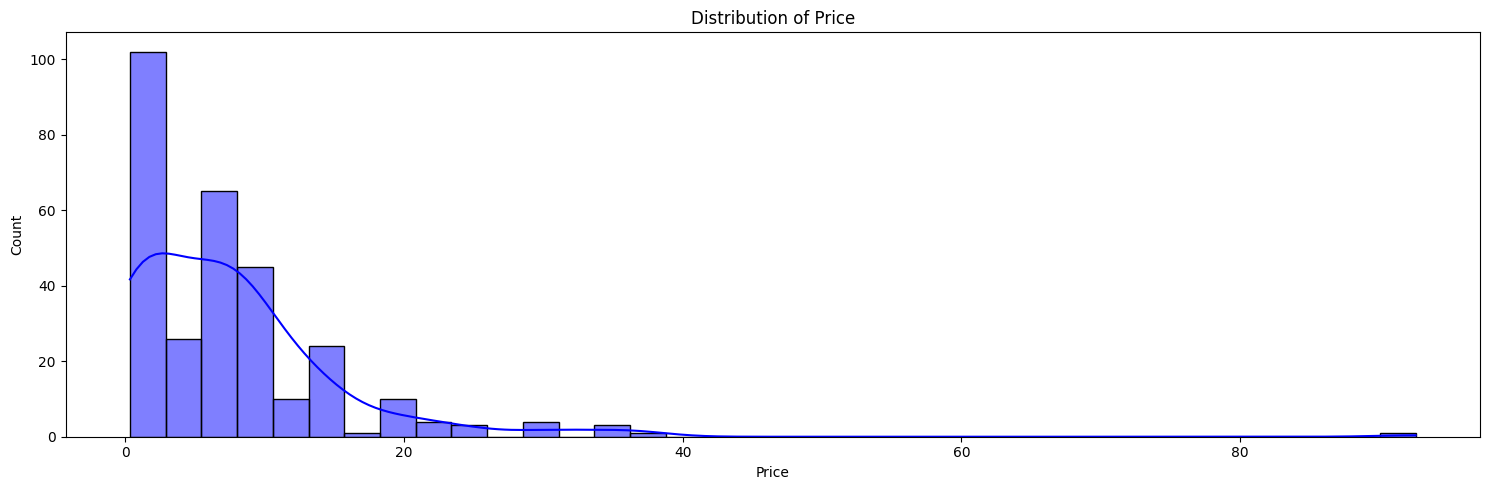

In [114]:
plt.figure(figsize = (15,5))
sns.histplot(data = df['Price'],kde = True,color = 'blue',edgecolor = 'black')
plt.title('Distribution of Price')
plt.tight_layout()
plt.show()

Insight from the Distribution of the price

This graph shows that most of the car price is between 1 lakhs to 17 lakhs and rest are the outliers in luxuries cars.

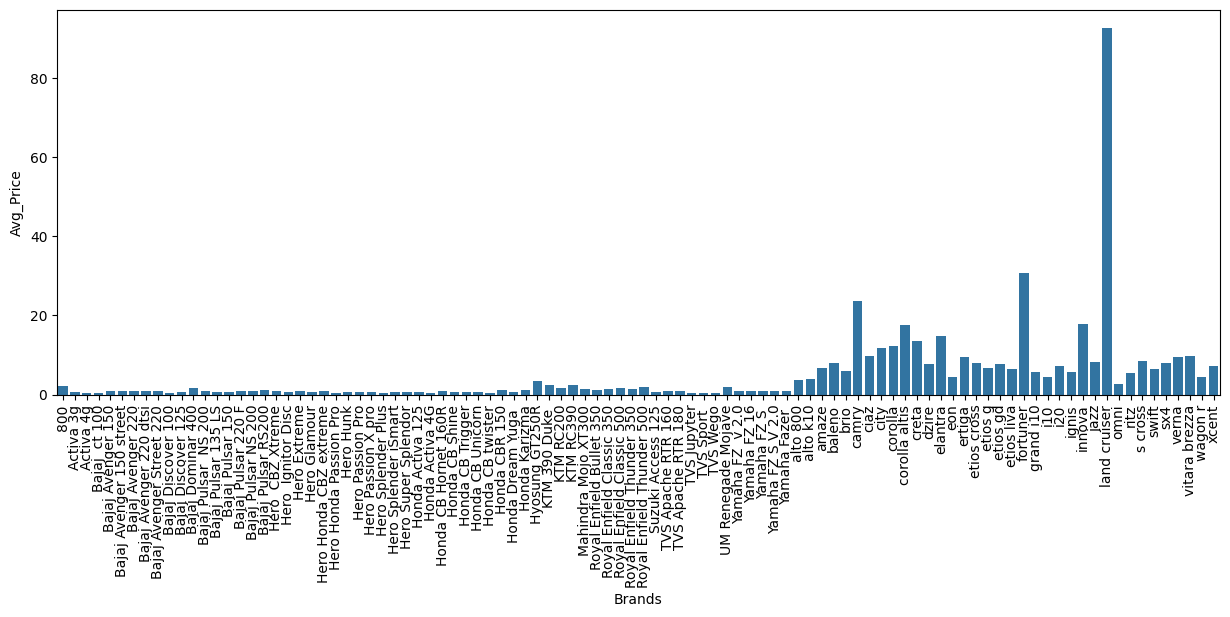

In [135]:
plt.figure(figsize=(15,5))
sns.barplot(data = avg_brand_price, x = 'Brands',y = 'Avg_Price' )
plt.xticks(rotation = 90)
plt.show()

In [137]:
df.groupby('Owner')['Brand'].value_counts().groupby(level = 0).head(20)

Owner  Brand                    
0      city                         26
       corolla altis                16
       verna                        14
       brio                         10
       fortuner                     10
       ciaz                          9
       innova                        9
       i20                           8
       Royal Enfield Classic 350     7
       amaze                         7
       grand i10                     7
       jazz                          7
       eon                           6
       sx4                           6
       alto k10                      5
       ertiga                        5
       i10                           5
       swift                         5
       Royal Enfield Thunder 350     4
       dzire                         4
1      Bajaj Discover 125            2
       Bajaj Pulsar 150              1
       Hero  Ignitor Disc            1
       Hero Hunk                     1
       Hyosung GT250R                1
       etios g                       1
       grand i10                     1
       i20                           1
       xcent                         1
3      camry                         1
Name: count, dtype: int64

In [138]:

class CarSale:
    def __init__(self, brand, model, year, price):
        self.brand = brand
        self.model = model
        self.year = year
        self.price = price

    def car_age(self, current_year=2025):
        return current_year - self.year

    def is_luxury(self):
        return self.price > 2000000

In [139]:
example = CarSale("Toyota", "Camry", 2018, 1600000)
print(f"Example car is {example.car_age()} years old. Luxury: {example.is_luxury()}")

Example car is 7 years old. Luxury: False


In [145]:
df.Brand.value_counts()

,count
Brand,
city,26
corolla altis,16
verna,14
brio,10
fortuner,10
...,...
Honda Activa 125,1
Hero Hunk,1
Hero Ignitor Disc,1
